# Linear Regression Example with Stochastic Gradient Descent 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Sample Data

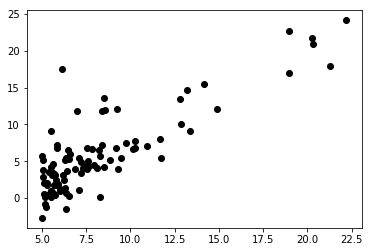

In [27]:
#read data
df = pd.read_csv("ex1data1.txt", header=None)

# Plot outputs
plt.scatter(df[0], df[1],  color='black')

plt.show()

## 2. Methods to execute prediction and estimate coefficents

 Linear Regression is simple:
 
    𝑦𝑖 = 𝑤1𝑥𝑖 + 𝑤0 

 Find the coefficients with Stochastic Gradient Descent(SGD):
    
    
    𝑤0=𝑤0+𝛼𝑒𝑖
    𝑤1=𝑤1+𝛼𝑒𝑖𝑥𝑖

In [28]:
def predict(x, coefs):
    ypred = coefs[0]
    ypred += coefs[1] * x
    return ypred

In [29]:
# Estimate linear regression coefficients using stochastic gradient descent
def estimate_coefs_SGD(train, alpha, epochs):

    list_MSE = []
    coefs = [0,0]
    for epochs in range(epochs):
        sum_error = 0
        np.random.shuffle(train)
        for x, y in train:
            ypred = predict(x, coefs)
            error = y - ypred
            sum_error += error**2
            coefs[0] = coefs[0] + alpha * error
            coefs[1] = coefs[1] + alpha * error * x
        
        #print('>epochs=%d, alpha=%.3f, error=%.3f' % (epochs, alpha, sum_error/len(train[ : ,0])))
        
        list_MSE.append(sum_error/len(train[: , 0]))
    
    return list_MSE, coefs

In [30]:
list_MSE, coefs = estimate_coefs_SGD(df.values, 0.001, 1000)
print(coefs)

[-3.87231002258138, 1.2549549084433809]


## 3. Visualize the Learning during Epochs

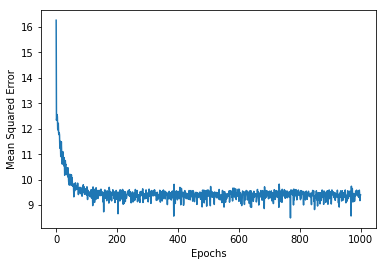

In [31]:
plt.plot(np.arange(len(list_MSE)), list_MSE)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()